In [26]:
import shapely.geometry as sg
import shapely
import numpy as np
import random
import math

import pandas as pd

from shapely.geometry import Polygon
from shapely.geometry.base import BaseGeometry

In [27]:
from shapely.geometry.polygon import geos_polygon_from_py

In [28]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
from degenerate_polygon import DegeneratePolygon
import geom_utils as gu

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


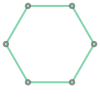

In [29]:
a, cent = 20,(10,10)
hex1 = gu.make_hex_poly(a,*cent)
hex1
gu.buffer_poly_vtx(hex1)

In [30]:
# make degen poly
goodhexcoords = hex1.exterior.coords[:]
degenhex = DegeneratePolygon(goodhexcoords)
type(degenhex)

degenerate_polygon.DegeneratePolygon

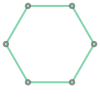

In [38]:
gu.buffer_poly_vtx(degenhex)

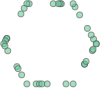

In [32]:
degenhex.make_degenerate()
gu.poly_as_mpt(degenhex)

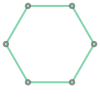

In [39]:
degenhex.simplify_by_interior_angle()
gu.buffer_poly_vtx(degenhex)

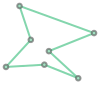

In [43]:
rand_poly = gu.generate_random_polygon(7)
gu.buffer_poly_vtx(rand_poly)

In [39]:
temp_poly_list = [ xlate(simplify_dict[tol],xoff=a*(e+1)*3.5) for e,tol in enumerate( sv) ]

In [40]:
for e,tol in enumerate( sv):
    print(e, tol)
    print(a*(e+1)*3.5)
    print('')

0 1e-10
70.0

1 0.1
140.0

2 1
210.0

3 10
280.0

4 100
350.0



In [41]:
for p in temp_poly_list:
    print(p.centroid.coords[:])

[(80.00000000000001, 10.0)]
[(149.99999999999997, 10.0)]
[(219.99999999999994, 10.0)]
[(287.79999999999995, 10.000000000000002)]
[(357.79999999999995, 10.000000000000002)]


In [42]:
pre_final_res = [poly_as_mpt(tp) for tp in temp_poly_list]
# sg.MultiPoint(pre_final_res)

# recursive union
# rec_union = [pre_final_res[0].]
def unionize_geom(geom_list):
    if len(geom_list) >1:
        pass
    else:
        raise Exception('fake list!')
        
    starting = geom_list[0]
    
    for p in geom_list[1:]:
        starting = starting.union(p)
    
    return starting
    
union_final = unionize_geom(pre_final_res)   


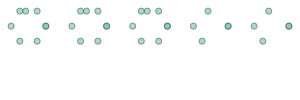

In [43]:
union_final

In [44]:
first = pre_final_res[0]

for i in pre_final_res[1:]:
    first = first.union(i)
    

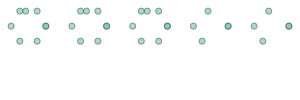

In [45]:
first

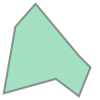

In [34]:
vals = generate_random_polygon(7)
# rand_poly = sg.Polygon(sg.Point(x) for x in vals)
rand_poly=sg.Polygon(vals)
rand_poly

In [ ]:
test_df = update_poly_pickle(rand_poly,return_df=True)
test_df.tail(10)

In [ ]:
simplify_by_interior_angle(rand_poly)

In [ ]:
poly_as_mpt(rand_poly)

In [ ]:
# pt bufferer


In [ ]:
len(poly_as_mpt(simplify_by_interior_angle(rand_poly)))

In [ ]:
buffpt = [sg.Point(x).buffer(1) for x in vals]
sg.MultiPolygon(buffpt).union(rand_poly.exterior)


In [ ]:
buffer_poly_vtx(poly= rand_poly,buffer=1)

In [ ]:
rand_degen = generate_degen(rand_poly)
rd_poly = sg.Polygon(rand_degen)

In [ ]:
poly_as_mpt(rd_poly)

In [ ]:
buffer_poly_vtx(rd_poly,buffer=.0000000001)

In [ ]:
sv = 1e-1

# simpol =rd_poly.simplify(sv,preserve_topology=True)
simpol =rd_poly.simplify(sv,preserve_topology=False)
print(len(poly_as_mpt(simpol)))
print('target num vertx ', len(vals))
buffer_poly_vtx(simpol)

In [ ]:
intpol= simplify_by_interior_angle(rd_poly,deg_tol=1)
# intpol= simplify_by_interior_angle(rd_poly)
print(len(poly_as_mpt((intpol))))
print('target num vtx', len(vals))
buffer_poly_vtx(intpol)

In [ ]:
buffer_poly_vtx(rand_poly)

In [ ]:
poly_as_mpt(rand_poly)